In [ ]:
%load_ext tensorboard

In [ ]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os


import keras
from keras import Model
import keras.layers as layers
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from keras.callbacks import TensorBoard, EarlyStopping
from keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator

from keras import datasets
from keras.utils import to_categorical

from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
img_train_path = os.path.join("DATASET","TRAIN")
img_test_path = os.path.join("DATASET","TEST")
data_gen = ImageDataGenerator(rescale=1./255, fill_mode='reflect', validation_split=0.33)
test_gen = ImageDataGenerator(rescale=1./255)
BATCH_SIZE = 128

train_generator = data_gen.flow_from_directory(img_train_path, target_size=(256,256), batch_size=BATCH_SIZE, subset='training')
validation_generator = data_gen.flow_from_directory(img_train_path, target_size=(256,256), batch_size=BATCH_SIZE, subset='validation')
test_generator = test_gen.flow_from_directory(img_test_path, target_size=(256,256), batch_size=BATCH_SIZE)

Found 15119 images belonging to 2 classes.
Found 7445 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
img, _= next(train_generator)
print(img.shape)

(128, 256, 256, 3)


In [ ]:
model = keras.Sequential()

model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(256,256,3), padding = 'Same'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', padding = 'Same'))
model.add(MaxPooling2D())





model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=2, activation = 'sigmoid'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(), metrics=['accuracy'], jit_compile=True)
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
callbacks_tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1)
# reduce time and overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 120)               7

In [12]:
steps_per_epoch = train_generator.labels.shape[0]//BATCH_SIZE
validation_steps = validation_generator.labels.shape[0]//BATCH_SIZE

model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=10, 
                    validation_data=validation_generator, validation_steps=validation_steps, 
                    shuffle=True, callbacks=[callbacks_tensorboard, early_stopping])

Epoch 1/10
118/118 [==============================] - 55s 470ms/step - loss: 0.3831 - accuracy: 0.8334 - val_loss: 0.4417 - val_accuracy: 0.8005
Epoch 2/10
118/118 [==============================] - 54s 454ms/step - loss: 0.3787 - accuracy: 0.8350 - val_loss: 0.4340 - val_accuracy: 0.8047
Epoch 3/10
118/118 [==============================] - 54s 454ms/step - loss: 0.3713 - accuracy: 0.8370 - val_loss: 0.4342 - val_accuracy: 0.8019
Epoch 4/10
118/118 [==============================] - 54s 457ms/step - loss: 0.3630 - accuracy: 0.8438 - val_loss: 0.4624 - val_accuracy: 0.7869
Epoch 5/10
118/118 [==============================] - 53s 453ms/step - loss: 0.3590 - accuracy: 0.8446 - val_loss: 0.4491 - val_accuracy: 0.8031
Epoch 6/10
118/118 [==============================] - 58s 496ms/step - loss: 0.3460 - accuracy: 0.8518 - val_loss: 0.4318 - val_accuracy: 0.8052
Epoch 7/10
118/118 [==============================] - 74s 627ms/step - loss: 0.3437 - accuracy: 0.8538 - val_loss: 0.4348 - val_ac

4/4 [==============================] - 1s 10ms/step


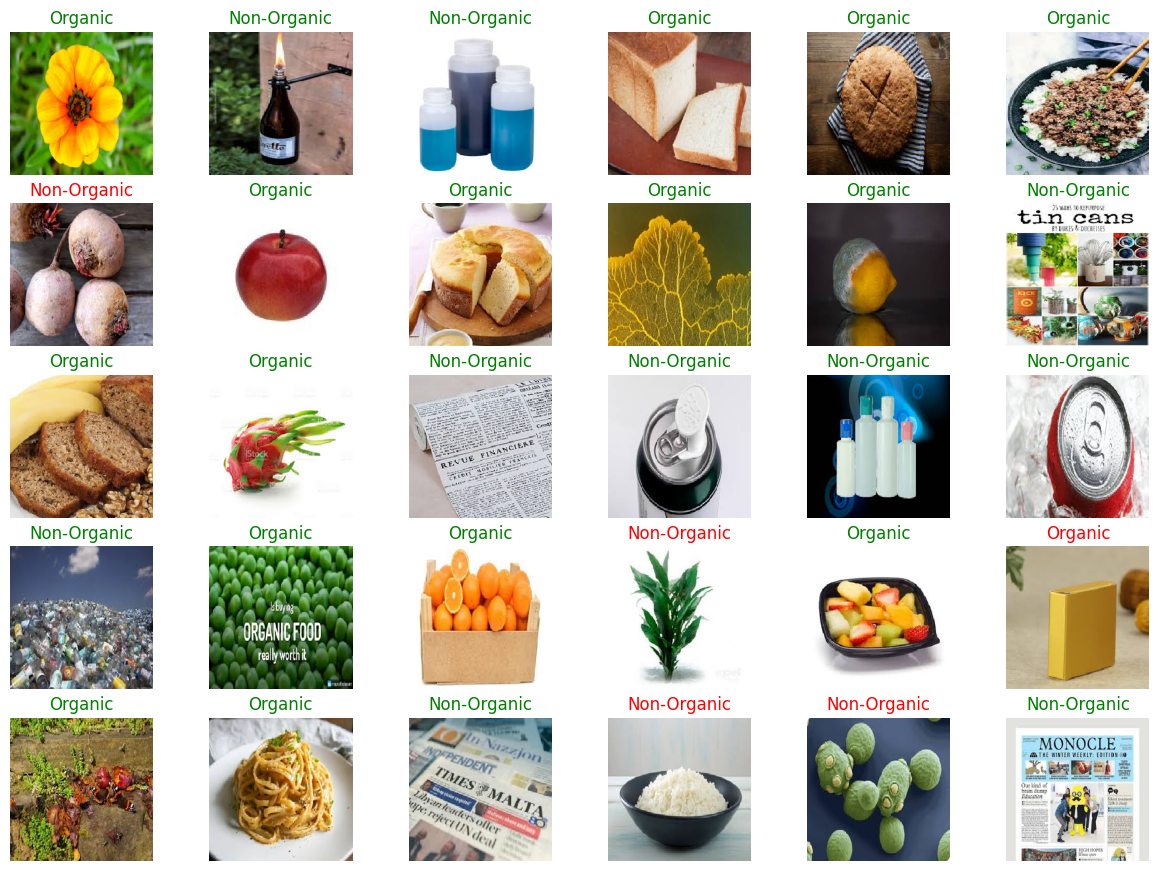

In [ ]:
img, _= next(validation_generator)
plt.figure(figsize=(15, 13))
result = model.predict(img)
for i in range(30):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(img[i])
    if result[i][1] < 0.5:
        pred = 0
        if pred == _[i][1]:
            plt.title("Organic", color='green')
        else: 
            plt.title("Organic", color='red')
    else:
        pred = 1
        if pred == _[i][1]:
            plt.title("Non-Organic", color='green')
        else: 
            plt.title("Non-Organic", color='red')
    plt.axis("off")

In [17]:
results = model.evaluate(test_generator)
print("test loss, test acc:", results)

20/20 [==============================] - 11s 578ms/step - loss: 0.3412 - accuracy: 0.8631
test loss, test acc: [0.34116145968437195, 0.8631118535995483]


In [ ]:
# %tensorboard --logdir logs/fit